<a href="https://colab.research.google.com/github/JinLeeGG/Python_CodingTest/blob/main/(Day14)%20Minimum%20Spanning%20Tree%20(MST)/CodingExample/%EC%B5%9C%EC%86%8C_%EC%8B%A0%EC%9E%A5_%ED%8A%B8%EB%A6%AC_%EC%B0%BE%EB%8A%94_%EB%AC%B8%EC%A0%9C%EC%9C%A0%ED%98%95(Greed_Algorithm_Dijkstra_Algorithm%2C_Kruskal_algorithm%2C_Floyd_Warshall_Algorithm)_Problems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 다익스트라 알고리즘문제 1
- 난이도 3
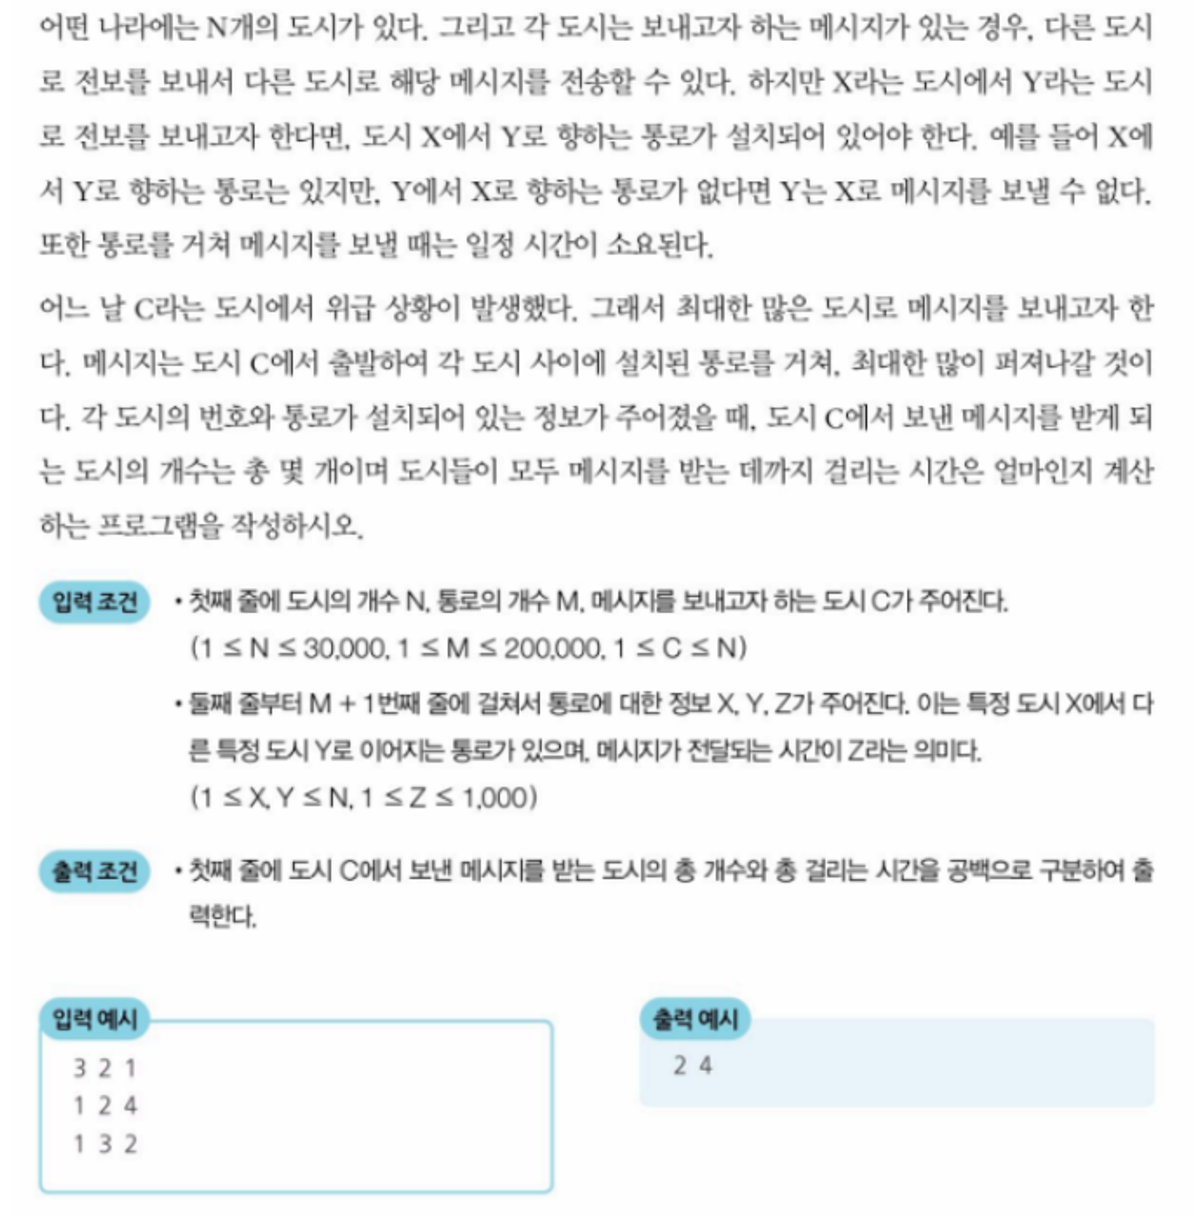

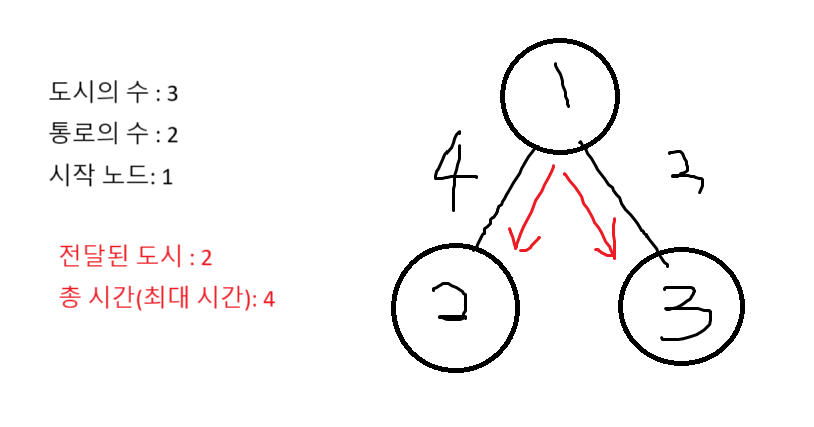

In [3]:
# 도시 개수 N, 통로의 개수 M, 메세지를 보내고자 하는 도시 C
import heapq

a = [ ]

def solution(N, M, C):
    # Create adjacency list for the graph
    graph = [[] for _ in range(N + 1)]
    for a, b, c in road:
        graph[a].append((b, c))  # Undirected graph: add edge a -> b
        graph[b].append((a, c))  # Add edge b -> a

    # Initialize distances
    distances = [float('inf')] * (N + 1)
    distances[1] = 0  # Start at node 1

    # Priority queue for Dijkstra's algorithm
    pq = [(0, 1)]  # (distance, node)

    while pq:
        curr_dist, curr_node = heapq.heappop(pq)

        # Skip if we've found a better path already
        if curr_dist > distances[curr_node]:
            continue

        # Explore neighbors
        for next_node, weight in graph[curr_node]:
            distance = curr_dist + weight

            # If a shorter path is found
            if distance < distances[next_node]:
                distances[next_node] = distance
                heapq.heappush(pq, (distance, next_node))

    # Count nodes with distance <= K
    answer = sum(1 for dist in distances[1:N+1] if dist <= K)

    return answer


# 코드 분석 문제:
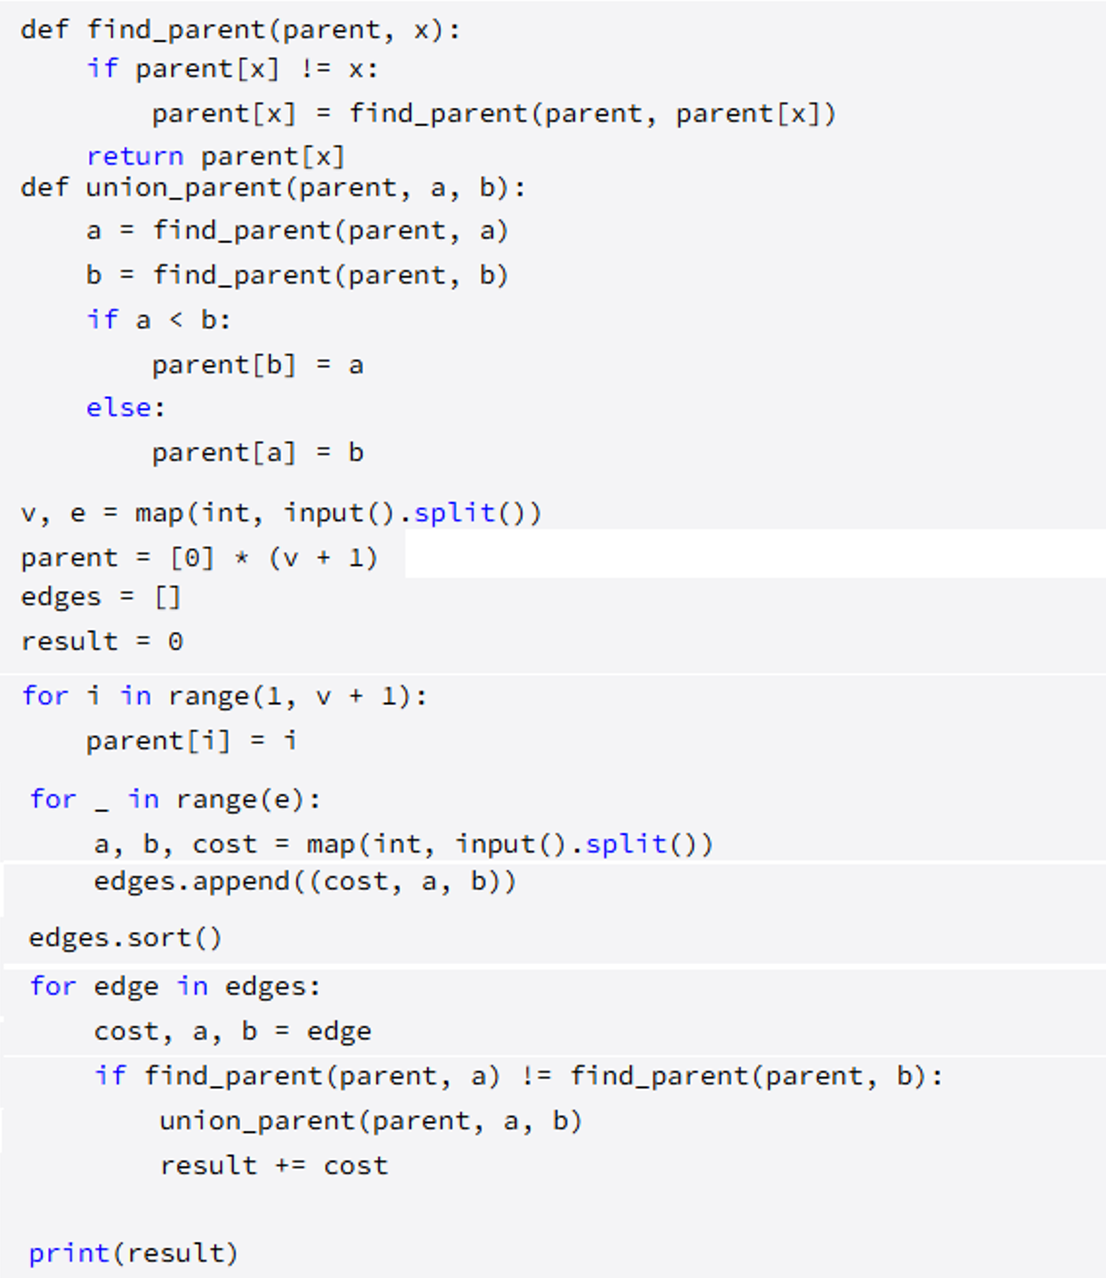

In [ ]:

# 부모 노드를 찾는 함수
def find_parent(parent, x):
    if parent[x] != x:  # 만약 x의 부모가 자기 자신이 아닌 경우
        parent[x] = find_parent(parent, parent[x])  # 부모의 부모노드를 찾아 루트 노드를 찾는다
    return parent[x]  # 루트 노드 반환

# 두 개의 트리를 병합
def union_parent(parent, a, b):
    a = find_parent(parent, a)  #a의 부모노드를 찾는다
    b = find_parent(parent, b)  #b의 부모노드를 찾는다.
    if a < b:
        parent[b] = a     # 더 작은 노드를 가진 트리가 다른 트리의 부모가 된다.
    else:
        parent[a] = b

# 정점의 개수(v)와 간선의 개수(e)를 입력받습니다.
v, e = map(int, input().split())
# 부모 노드를 저장할 배열을 초기화합니다.
parent = [0] * (v + 1)
# 간선 정보를 저장할 리스트를 초기화합니다. (비용, 정점1, 정점2) 형태로 저장됩니다.
edges = []
# 최소 신장 트리의 총 비용을 저장할 변수를 초기화합니다.
result = 0

# 모든 정점의 초기 부모 노드를 자기 자신으로 설정합니다. (각 정점이 처음에는 별도의 집합)
for i in range(1, v + 1):
    parent[i] = i

# 간선 정보를 입력받아 edges 리스트에 추가합니다.
for _ in range(e):
    a, b, cost = map(int, input().split())
    edges.append((cost, a, b))

# 간선을 비용 순서대로 오름차순으로 정렬합니다.
edges.sort()

# 간선을 하나씩 살펴보며 최소 신장 트리를 구성합니다.
for edge in edges:
    cost, a, b = edge
    # 두 정점이 서로 다른 집합에 속하는 경우 (사이클이 생성되지 않는 경우)
    if find_parent(parent, a) != find_parent(parent, b):
        # 두 정점이 속한 집합을 합칩니다.
        union_parent(parent, a, b)
        # 간선의 비용을 최소 신장 트리의 총 비용에 더합니다.
        result += cost

# 최소 신장 트리의 총 비용을 출력합니다.
print(result)

# 크루스칼 알고리즘 3
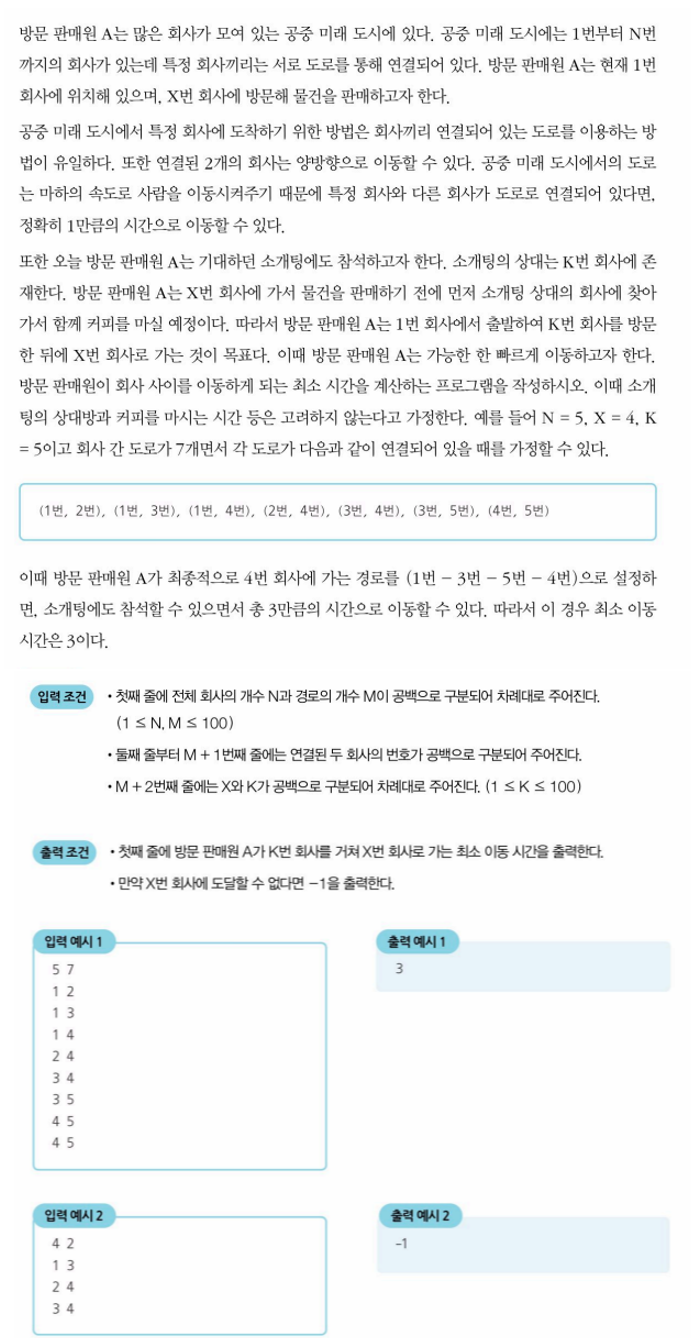

In [6]:
import heapq

def dijkstra(graph, start, end, n):
    distances = [float('inf')] * (n + 1)  #
    distances[start] = 0
    pq = [(0, start)]

    while pq:
        current_distance, current_node = heapq.heappop(pq)

        if current_distance > distances[current_node]:
            continue

        for neighbor, weight in graph[current_node]:
            distance = current_distance + weight

            if distance < distances[neighbor]:
                distances[neighbor] = distance
                heapq.heappush(pq, (distance, neighbor))

    return distances[end]

# 입력 처리
# 전체 회사의 개수 N과 경로의 개수 M
n, m = map(int, input().split())

# 개수 N 만큼 빈 그래프 생성
graph = [[] for _ in range(n + 1)]

# 경로의 개수 M만큼
for _ in range(m):
    x, y = map(int, input().split())
    graph[x].append((y, 1)) # 튜플 형태로 가중치 1
    graph[y].append((x, 1))

x, k = map(int, input().split())

# K번 회사에서 X번 회사까지 최단 경로 계산
result = dijkstra(graph, k, x, n)

# 결과 출력
if result != float('inf'):
   print(result)
else:
   print(-1)



4 2
1 3
2 4
3 4
-1


# 3번 Floyd-Warshall로 문제풀이
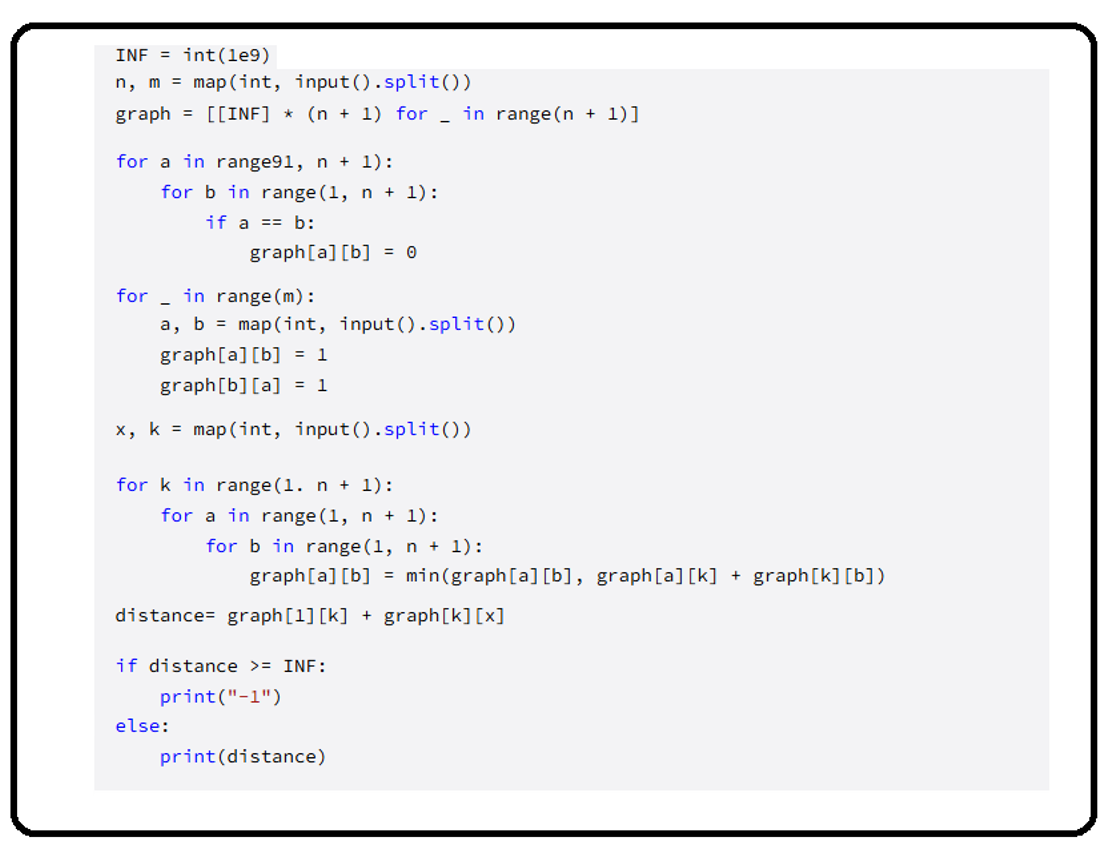


In [11]:
# Answer provided (Floyd-Warshall)
INF = int(1e9)  # 무한대를 나타내는 숫자
n, m = map(int, input().split())  # 노드 수 (N), 간선의 수 (M)
graph = [[INF] * (n + 1) for _ in range(n + 1)] # 인접 행렬을 나타내는 2차원 리스트 (INF 값 초기화)

for a in range(1, n+1):     # 각 노드에 대해
  for b in range(1, n+1):   # 다른 모든 노드에 대해
      if a == b:            # 자기 자신으로 가는 거리는 0으로 설정
          graph[a][b] = 0

for _ in range(m):                      # 간선 수 (m) 만큼 반복
    a, b = map(int, input().split())    # 두 노드(a,b) 를 입력
    graph[a][b] = 1                     # a b 사이의 거리를 1로 설정 (가중치 1)
    graph[b][a] = 1                     # b a 사이도 같이 설정 (무방향)

x, k = map(int, input().split())        # 시작노드 X, 중간노드 K

for k in range(1, n+1):                 # 가능한 모든 중간 노드 k에 대해 반복
  for a in range(1, n+1):               # 모든 노드 쌍 (a, b)에 대해 반복
    for b in range(1, n+1):
      graph[a][b] = min(graph[a][b], graph[a][k] + graph[k][b])   #중단 노드 k를 거쳐가는 경로가 더 짧으면 거리 업데이트

distance = graph[1][k] + graph[k][x] # 노드 1에서 k까지, k에서 x까지의 거리 합계 계산

if distance  >= INF:  # 거리가 INF 이상이면 경로가 없음 --> -1 출력
    print("-1")
else:
    print(distance)   # 그렇지 않으면 계산된 거리 (최단 경로) 출력

4 2
1 3
2 3
3 4
-1


# 문제 4
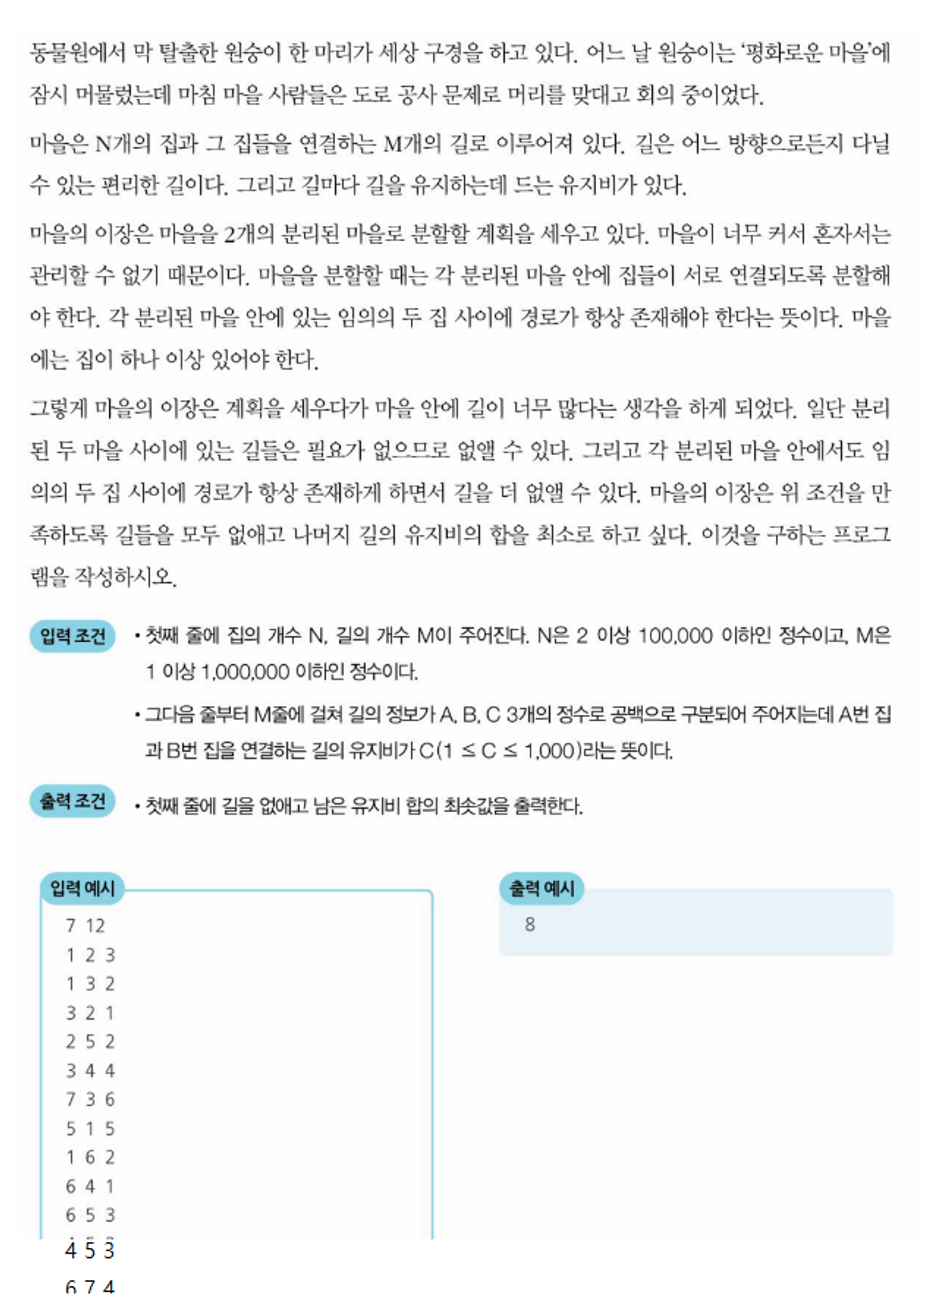

In [ ]:
# 부모 노드를 찾는 함수
def find_parent(parent, x):
    if parent[x] != x:  # 만약 x의 부모가 자기 자신이 아닌 경우
        parent[x] = find_parent(parent, parent[x])  # 부모의 부모노드를 찾아 루트 노드를 찾는다
    return parent[x]  # 루트 노드 반환

# 두 개의 트리를 병합
def union_parent(parent, a, b):
    a = find_parent(parent, a)  #a의 부모노드를 찾는다
    b = find_parent(parent, b)  #b의 부모노드를 찾는다.
    if a < b:
        parent[b] = a     # 더 작은 노드를 가진 트리가 다른 트리의 부모가 된다.
    else:
        parent[a] = b

# 정점의 개수(v)와 간선의 개수(e)를 입력받습니다.
v, e = map(int, input().split())
# 부모 노드를 저장할 배열을 초기화합니다.
parent = [0] * (v + 1)
# 간선 정보를 저장할 리스트를 초기화합니다. (비용, 정점1, 정점2) 형태로 저장됩니다.
edges = []
# 최소 신장 트리의 총 비용을 저장할 변수를 초기화합니다.
result = 0

# 모든 정점의 초기 부모 노드를 자기 자신으로 설정합니다. (각 정점이 처음에는 별도의 집합)
for i in range(1, v + 1):
    parent[i] = i

# 간선 정보를 입력받아 edges 리스트에 추가합니다.
for _ in range(e):
    a, b, cost = map(int, input().split())
    edges.append((cost, a, b))

# 간선을 비용 순서대로 오름차순으로 정렬합니다.
edges.sort()

# 간선을 하나씩 살펴보며 최소 신장 트리를 구성합니다.
for edge in edges:
    cost, a, b = edge
    # 두 정점이 서로 다른 집합에 속하는 경우 (사이클이 생성되지 않는 경우)
    if find_parent(parent, a) != find_parent(parent, b):
        # 두 정점이 속한 집합을 합칩니다.
        union_parent(parent, a, b)
        # 간선의 비용을 최소 신장 트리의 총 비용에 더합니다.
        result += cost

# 최소 신장 트리의 총 비용을 출력합니다.
print(result)

# 그리드 알고리즘 문제:

# 문제 5
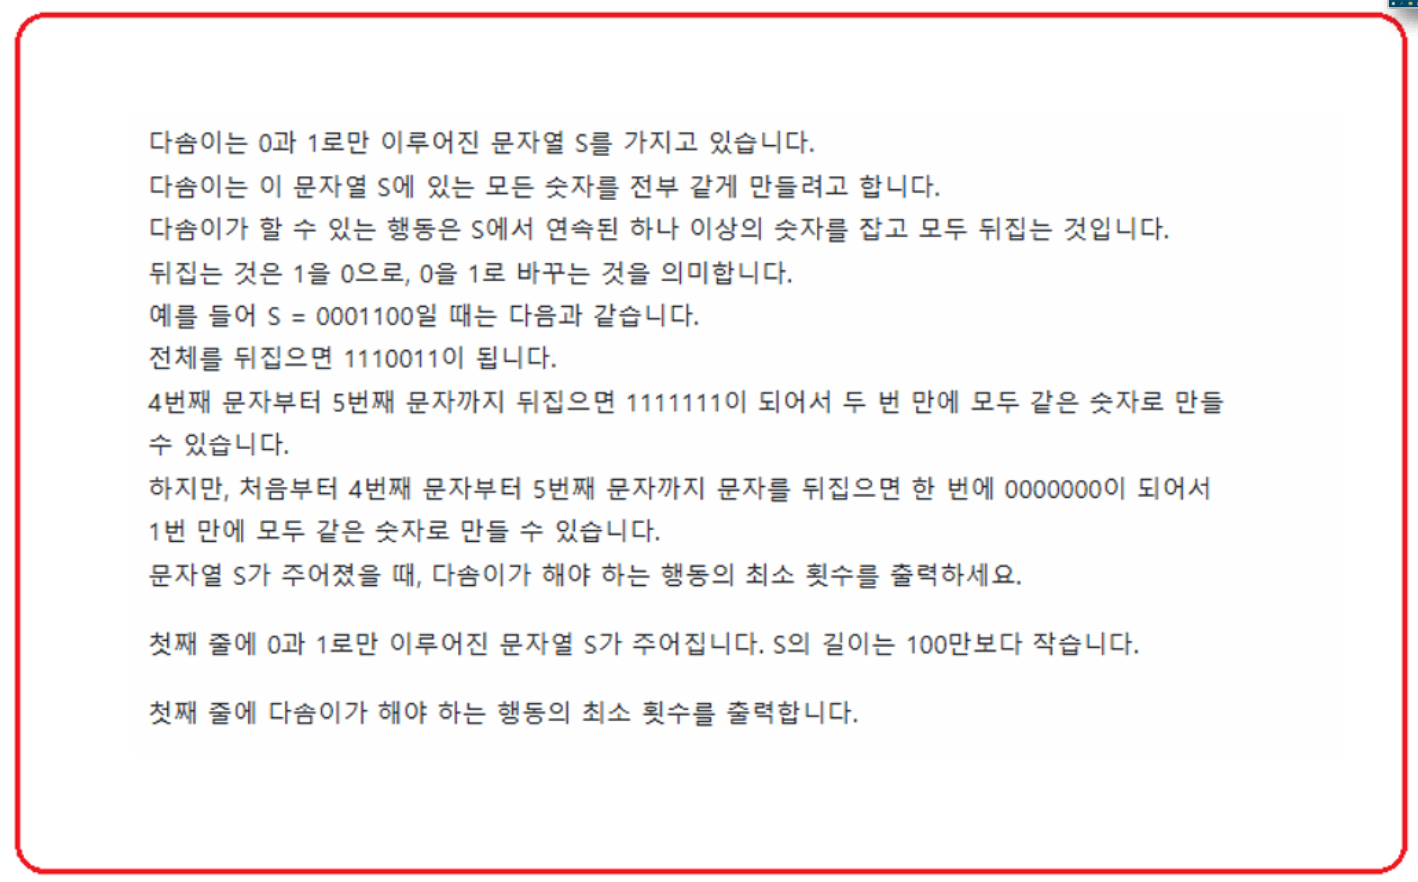

In [17]:
def solution(s):
    countOne = s.count('1')
    countZero = s.count('0')
    if countOne > countZero:
        print(countZero)
    else:
        print(countOne)

solution('1110011')

2


In [43]:
def solution(s):
    countZero = 0
    countOne = 0

    for i in range(len(s)):
        if s[i] != s[i - 1]:
            if s[i] == '0':
                countZero += 1
            else:
                countOne += 1

        # print(countZero, "zero")
        # print(countOne, "One")

    minimum = min(countOne, countZero)


    return minimum

print(solution('1110011'))
print(solution('0001100'))

0 zero
0 One
0 zero
0 One
0 zero
0 One
1 zero
0 One
1 zero
0 One
1 zero
1 One
1 zero
1 One
1
0 zero
0 One
0 zero
0 One
0 zero
0 One
0 zero
1 One
0 zero
1 One
1 zero
1 One
1 zero
1 One
1


# 문제 6
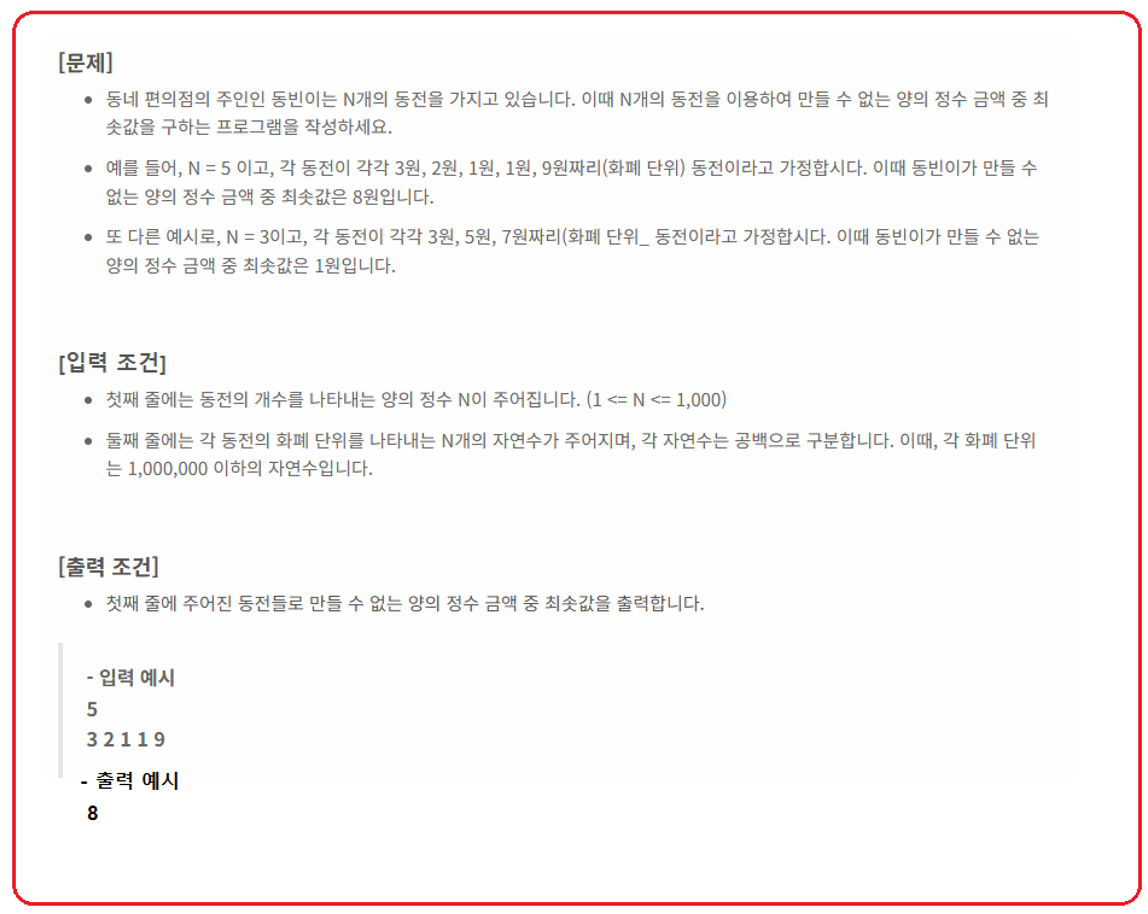

In [40]:

def solution(nums):
  # 입력 받은 숫자를 모든 경우의 수로 더했을때 나오는 수를 구하기
  # 그중 제일 큰 입력값보다 작은 수를 찾기
  # 그 수중 비어있는 숫자를 찾기
  # 비어있는 숫자중 가장 작은 수 반환
  return nums


# 입력 받기
n = int(input())
lists = list(map(int, input().split()))
# 결과 출력
print(solution(nums))

5 
3 2 1 1 9
2
3
5
8
8


In [45]:
def solution(nums):
    max_num = max(nums)
    possible_sums = set([0])

    for num in nums:
        new_sums = set()
        for s in possible_sums:
            new_sums.add(s + num)
        possible_sums.update(new_sums)

    for i in range(1, max_num):
        if i not in possible_sums:
            return i

    return None  # 모든 수가 가능하면 None 반환

nums = [3, 2, 1, 1, 9]
print(solution(nums))

8
